# Thinkful Challenge - What Do You See?
## William Liao
### September 15, 2017

### Importing libraries

Import libraries: pandas, numpy, seaborn, scipy.stats and matplotlib

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import kendalltau
import matplotlib.pyplot as plt
%matplotlib inline

### Read in and preview data set 1 with pandas

The following data is provided by the US Census Bureau via Kaggle.

Data can be downloaded __[here](https://www.kaggle.com/census/international-data)__

In [38]:
#read in .csv
df = pd.read_csv('mortality_life_expectancy.csv')

#preview first 5 rows of data frame
df.head(5)

,country_code,country_name,year,infant_mortality,infant_mortality_male,infant_mortality_female,life_expectancy,life_expectancy_male,life_expectancy_female,mortality_rate_under5,mortality_rate_under5_male,mortality_rate_under5_female,mortality_rate_1to4,mortality_rate_1to4_male,mortality_rate_1to4_female
0,SI,Slovenia,2036,3.39,3.76,3.00,80.90,77.51,84.52,3.93,4.39,3.44,0.54,0.63,0.44
1,SI,Slovenia,2022,3.76,4.22,3.27,79.11,75.58,82.89,4.43,5.02,3.81,0.68,0.80,0.54
2,SI,Slovenia,2023,3.73,4.18,3.25,79.26,75.73,83.02,4.39,4.97,3.78,0.67,0.79,0.53
3,SI,Slovenia,2024,3.70,4.14,3.22,79.40,75.89,83.15,4.35,4.91,3.74,0.65,0.77,0.52
4,SI,Slovenia,2025,3.67,4.10,3.20,79.55,76.04,83.29,4.31,4.86,3.71,0.64,0.76,0.51


### Understanding mortality & gender discrepancies in Slovenia

#### Histogram Subplots of Mortality Rates

Slovenian population clearly lives well into their 60s, 70s and so forth. When the same histogram is generated for each gender, it's clear that Slovenian females tend to live longer than Slovenian males.

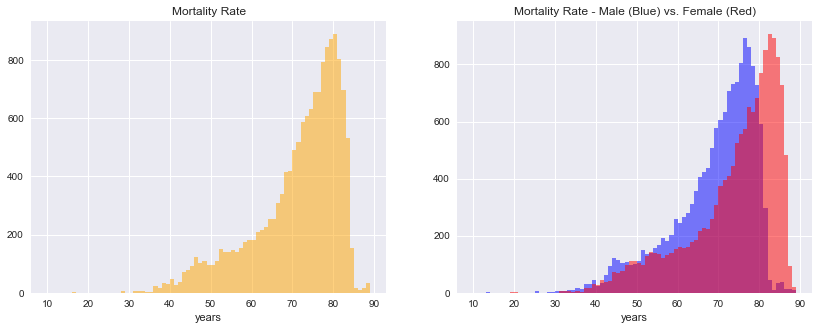

In [77]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.hist(df['life_expectancy'],bins=np.arange(10,90),alpha=.5,color='orange')
plt.title('Mortality Rate')
plt.xlabel('years')

plt.subplot(1,2,2)
plt.hist(df['life_expectancy_male'],bins=np.arange(10,90),alpha=.5,color='blue')
plt.hist(df['life_expectancy_female'],bins=np.arange(10,90),alpha=.5,color='red',label='test2')
plt.title('Mortality Rate - Male (Blue) vs. Female (Red)')
plt.xlabel('years')
plt.show()




### Read in and preview data set 2 with pandas

The following data set is about employee satisfaction.

Data can be downloaded __[here](https://www.kaggle.com/ludobenistant/hr-analytics)__

In [40]:
#read in .csv
df2 = pd.read_csv('HR_comma_sep.csv')

#preview first 5 rows of data frame
df2.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Summarizing and understanding the data

#### Box Plot of Employee Satisfaction

Useful for initial exploration and understanding/summarizing the data set. Half of participants' satisfaction levels were greater than .6. 25% of participants' satisfaction levels were greater than .8.

{'boxes': [<matplotlib.lines.Line2D at 0x11f8c7160>],
 'caps': [<matplotlib.lines.Line2D at 0x11f8cebe0>,
 'fliers': [<matplotlib.lines.Line2D at 0x11f8d3eb8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11f8d3668>],
 'whiskers': [<matplotlib.lines.Line2D at 0x11f8c7b00>,
  <matplotlib.lines.Line2D at 0x11f8c7d30>]}

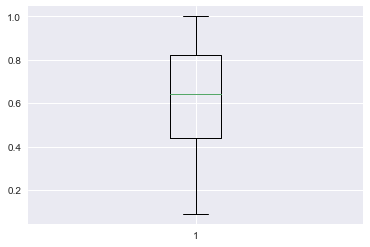

In [45]:
 plt.boxplot(df2['satisfaction_level'])

### A deeper look into employee satisfaction

#### Joint plot of Satisfaction Level vs. Project Load

_Initial_ impression -- employees satisfaction range is sustained up to a point. Significant drop in high satisfaction observations at project loads of 7+. The next visualization will show that there's more to this story. 

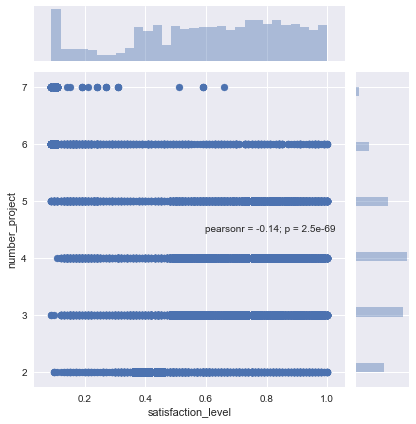

In [80]:
sns.jointplot(x='satisfaction_level',y='number_project',data=df2)

#### Joint plot of Satisfaction Level vs. Project Load V2

Opacity was introduced to maximimize resolution of visualization.  

Employees who took on 3-5 projects were most satisfied. Employees with project loads outside that range were considerably less satisfied (less than .5). Contrary to previous visualization, the opacity shows subtle differences in satisfaction amongst employees with 3-5 projects. In a business context, this information might be valuable for managers to know. 

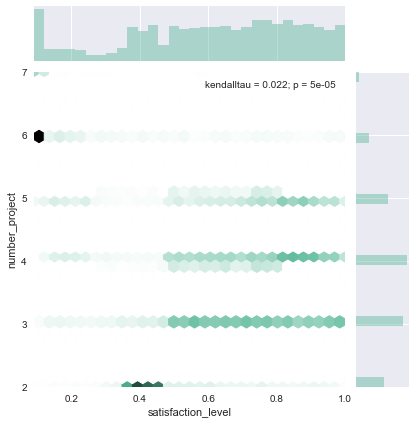

In [84]:
sns.jointplot(x='satisfaction_level',y='number_project',data=df2,kind="hex",stat_func=kendalltau,color="#4CB391")

#### Joint Plot of Satisfaction Level vs. Average Monthly Hours 

Employees who put in a moderate amount of monthly hours (165 - 235) were most satisfied with their work. Observations of low satisfaction (less than .5) were observed for employees Employees who put in too few (less than 165) or too many (greater than 265) hours towards their job each month. 


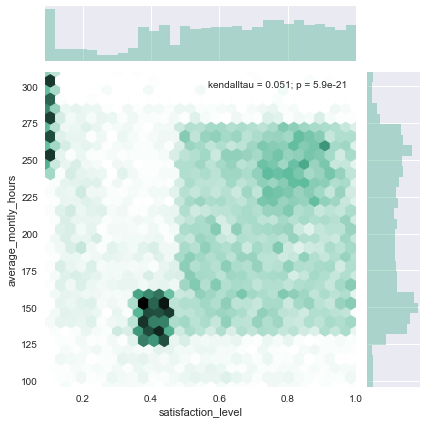

In [51]:
sns.jointplot(x='satisfaction_level',y='average_montly_hours',data=df2,kind="hex",stat_func=kendalltau,color="#4CB391")